In [1]:
import pandas as pd

In [2]:
csv_data = pd.read_csv("HR_comma_sep.csv")

In [3]:
csv_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
csv_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

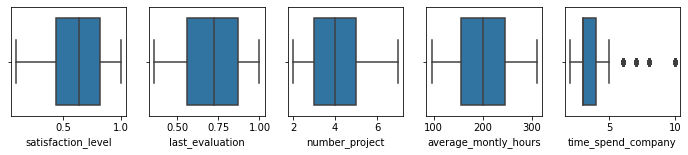

In [8]:
fig, ax = plt.subplots(1,5, figsize=(12, 2))
sns.boxplot(x=csv_data.columns[0], data=csv_data, ax=ax[0])
sns.boxplot(x=csv_data.columns[1], data=csv_data, ax=ax[1])
sns.boxplot(x=csv_data.columns[2], data=csv_data, ax=ax[2])
sns.boxplot(x=csv_data.columns[3], data=csv_data, ax=ax[3])
sns.boxplot(x=csv_data.columns[4], data=csv_data, ax=ax[4])

In [9]:
from pyecharts import Pie

In [10]:
# 总体情况  -- 饼图
item_name_list =['在职','离职']
value_list = [csv_data['left'].value_counts()[1],csv_data['left'].value_counts()[0]]
pie = Pie("人力资源占比",title_pos='center')
pie.add("",item_name_list,value_list,radius=[35, 65],is_label_show=True,legend_orient="vertical",legend_pos="left")

In [11]:
# 满意度调查 -- 箱线图
from pyecharts import Boxplot
boxplot = Boxplot("满意度和是否离职关系",title_pos='center')
x_list = ['在职','离职']
y_list = [csv_data[csv_data.left==0].satisfaction_level.values,csv_data[csv_data.left==1].satisfaction_level.values]
boxplot.add('',x_list,boxplot.prepare_data(y_list))

In [12]:
# 参与项目与是否离职关系  -- 柱状图，网格图，饼图
from pyecharts import Bar,Pie,Grid
# 按项目数分组，求项目数量对应的人数及离职人数
project_left_1 = csv_data[csv_data.left ==1].groupby('number_project')['left'].count()
project_left_all = csv_data.groupby('number_project')['left'].count()

# 求离职人员和在职人员的比例
project_left1_rate = project_left_1/project_left_all
project_left0_rate = 1-project_left1_rate
attr = project_left1_rate.index

bar = Bar("所参加项目数与是否离职的关系图", title_pos='10%')
bar.add("离职",attr,project_left1_rate,is_stack=True)
bar.add('在职',attr,project_left0_rate,is_stack=True,legend_pos="left",legend_orient="vertical")

# 饼图
pie = Pie("各项目数所占百分比",title_pos='center')
pie.add('',project_left_all.index,project_left_all, radius=[35, 60], legend_orient="vertical", 
        legend_pos="67%",is_label_show=True, label_text_color=None)

# 网格图，同时显示饼图和柱状图
grid= Grid(width = 1200)
grid.add(bar,grid_right="67%")
grid.add(pie)

In [13]:
# 数据处理
# 离散数据定序:薪资水平其含有顺序意义, 因此将其字符型转化为数值型
csv_data['salary'] = csv_data.salary.map({"low":0,"medium":1,"high":2})
csv_data.salary.head()

0    0
1    1
2    1
3    0
4    0
Name: salary, dtype: int64

In [14]:
# 归一
hours = csv_data['average_montly_hours']
csv_data['average_montly_hours'] = csv_data.average_montly_hours.apply(lambda x:(x-hours.min())/(hours.max()-hours.min()))

In [15]:
# 逻辑回归测试
from sklearn.model_selection import train_test_split
# 切分训练集和测试集
csv_data=csv_data.drop(['sales'],axis=1)
x_data = csv_data.drop(["left"],axis=1)
y_data = csv_data['left']
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
print("训练集准确率:"+str(LR.score(x_train,y_train)))
print("测试集准确率:"+str(LR.score(x_test,y_test)))

训练集准确率:0.7947328944078673
测试集准确率:0.7826666666666666
